## Get ERA5 reanalysis data from ECMWF Climate Data Store (CDS) 

- Need cdsapi package
- Create an account on ECMWF CDS and create API key in local file ~/.cdsapirc  
    - See simple instructions for ERA5 download in Python here: https://retostauffer.org/code/Download-ERA5/


Data download requests can be sent programatically via ECMWF API. However, a user ID and API key must be sent using HTTP basic authentication.  These are contained in local file ```~/.cdsapi```


## Example download monthly data

Change parameters to match. 

In [ ]:
# example ERA5 CDS call;  for monthly averaaged data.   
# need to have CDS account set up and token for CDS service 
# see instructions on ECMWF CDS server 

import cdsapi

download_to_fname = './data/raw/download_era5_monthly_1979_2020.nc'

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '10m_wind_speed',
            '2m_temperature', 'instantaneous_10m_wind_gust', 'mean_sea_level_pressure',
            'sea_surface_temperature',
        ],
        'year': ['1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
                 '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
                 '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
                 '2015', '2016', '2017', '2018', '2019', '2020'],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            70, -30, 40,
            10,
        ],
        'format': 'netcdf',
    },
    download_to_fname)

## Example download 1 day of daily data 

In [ ]:
import cdsapi

download_to_fname = './data/raw/download_1day.nc'

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '10m_wind_gust_since_previous_post_processing',
            '2m_temperature', 'instantaneous_10m_wind_gust', 'mean_sea_level_pressure',
            'sea_surface_temperature',
        ],
        'year': '2020',
        'month': '11',
        'day': '15',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            70, -30, 40,
            10,
        ],
    },
    download_to_fname)

## To read ERA5 into xarray dataset

In [2]:
import os 
import xarray as xr
from path import Path

fname = "download_era5_monthly_1979_2020.nc"
rawDir = './data/raw'
era5File  = Path(os.path.join(rawDir,fname))

ds = xr.open_dataset(era5File)

ds.assign_attrs({'datasetName': 'era5'})

dsEra5 = ds
%store dsEra5


Stored 'dsEra5' (Dataset)


# Quick example plots

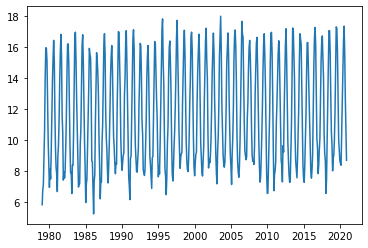

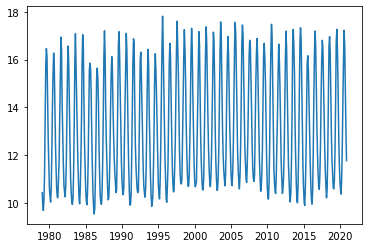

In [25]:
from  matplotlib import pyplot as plt 

x = ds.t2m.mean(["latitude", "longitude"])

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x.time, x-273.15)
plt.show()

x = ds.sst.mean(["latitude", "longitude"])

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x.time, x-273.15)
plt.show()


# diff between sst and t2m (+ve is warmer SST)  
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ds.time, ds.sst.mean(["latitude", "longitude"])-ds.t2m.mean(["latitude", "longitude"]))
plt.show()
